# Centroid Based Clustering (Flat/Partitional)

Centroid-based clustering groups data points into a pre-defined number of clusters. It works by iteratively assigning data points to the cluster whose "centroid" (the center or mean of the cluster's points) is closest, and then recalculating the centroids based on the new cluster assignments. The goal is to minimize the distance between points and their assigned cluster's centroid.

### K-means (Most common)

Iteratively assigns points to the nearest cluster center and updates centers as the mean of points.

KMeans clustering took 0.0050 seconds


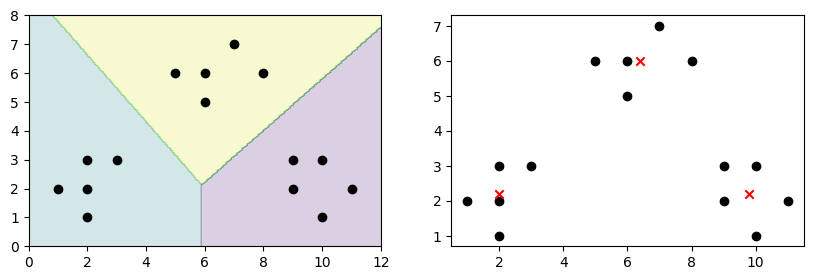

In [91]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the data points for clustering
data = np.array([
    [1, 2], [2, 1], [2, 2], [3, 3], [2, 3],
    [5, 6], [6, 5], [6, 6], [8, 6], [7, 7],
    [9, 2], [10, 1], [9, 3], [11, 2], [10, 3]
])

# Perform KMeans clustering
initial_time = time.time()
kmeans = KMeans(3).fit(data)
centroids = kmeans.cluster_centers_
final_time = time.time()
print(f"KMeans clustering took {final_time - initial_time:.4f} seconds")

# Create a grid for contour plotting
xx, yy = np.meshgrid(np.linspace(0, 12, 200), np.linspace(0, 8, 200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.contourf(xx, yy, Z, alpha=0.2)
ax1.scatter(data[:, 0], data[:, 1], c="k")
ax2.scatter(*data.T, c="k")
ax2.scatter(*centroids.T, marker="x", c="red")
plt.show()

### K-medoids

Like K-means, but uses actual data points (medoids) as centers to reduce sensitivity to outliers. Among its variants we encounter: **PAM**, is less sensitive to outliers compared to k-means. And **CLARA**, which is an extension to PAM adapted for large data sets.


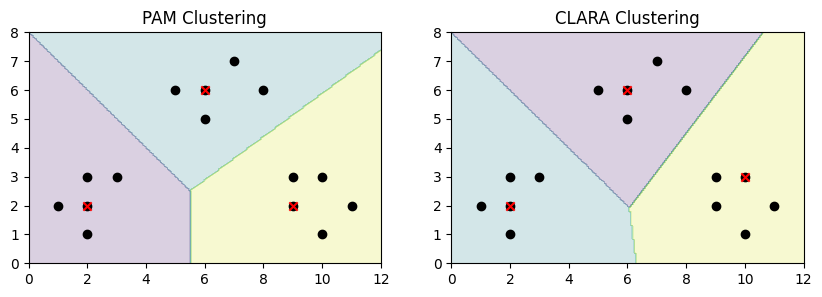

In [92]:
from sklearn_extra.cluster import KMedoids, CLARA

# PAM and CLARA clustering
pam = KMedoids(n_clusters=3, method='pam', random_state=0).fit(data)
pam_medoids = data[pam.medoid_indices_]

clara = CLARA(n_clusters=3, random_state=0).fit(data)
clara_medoids = data[clara.medoid_indices_]


# Create a grid for contour plotting
xx, yy = np.meshgrid(np.linspace(0, 12, 200), np.linspace(0, 8, 200))

Z_pam = pam.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_clara = clara.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.contourf(xx, yy, Z_pam, alpha=0.2)
ax1.scatter(*data.T, c='k', label='Data points')
ax1.scatter(*pam_medoids.T, c='red', marker='x')
ax1.set_title("PAM Clustering")
ax2.contourf(xx, yy, Z_clara, alpha=0.2)
ax2.scatter(data[:, 0], data[:, 1], c='k', label='Data points')
ax2.scatter(clara_medoids[:, 0], clara_medoids[:, 1], c='red', marker='x')
ax2.set_title("CLARA Clustering")

plt.show()

### K-means++

A smarter initialization method for K-means to improve clustering stability and reduce convergence time. Often used as a drop-in improvement for basic K-means.

K-means++ took 0.0041 seconds


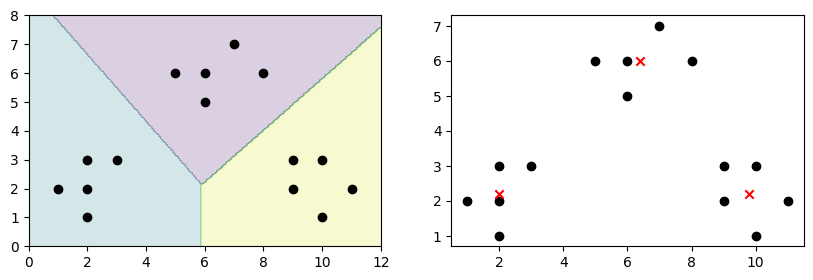

In [93]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the data points
data = np.array([
    [1, 2], [2, 1], [2, 2], [3, 3], [2, 3],
    [5, 6], [6, 5], [6, 6], [8, 6], [7, 7],
    [9, 2], [10, 1], [9, 3], [11, 2], [10, 3]
])

# Perform k-means clustering with k-means++ initialization
start_time = time.time()
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(data)
end_time = time.time()
print(f"K-means++ took {end_time - start_time:.4f} seconds")

# Cluster centers and labels
centers = kmeans.cluster_centers_

# Create a grid for contour plotting
xx, yy = np.meshgrid(np.linspace(0, 12, 200), np.linspace(0, 8, 200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.contourf(xx, yy, Z, alpha=0.2)
ax1.scatter(data[:, 0], data[:, 1], c="k")
ax2.scatter(*data.T, c="k")
ax2.scatter(*centers.T, marker="x", c="red")
plt.show()

